<div style="border:1px solid black; padding:10px; background-color: #F8F8F8;">
    <strong> <b>Notions et fonctions</b></strong><br>.
    <i> Les notions et procédures apparaissant pour la première fois dans le cours sont suivies d'un astérisque
    <ul>
        <li>Variables quantitatives discrètes</li>
        <li>Variables de type float</li>
        <li>Supprimer des colonnes du data frame avec pandas et drop</li>
        <li>Grouper des lignes en fonction de la valeur des colonnes avec groupby</li>
        <li> Fstrings : chaînes de caractères incluant des expressions python</li>
    </ul>
    <strong> Comme d'habitude certaines cellules sont dépendantes de cellules précédnetes. Il faut donc les éxécuter en suivant leur ordre dans la page</strong> </div> 
</div>



## révisions
<ul>
    <li>Visualisations à reporter sur un carnet spécifique ?</li>
    <li> aj gestion des données manquantes et nulles </li>
</ul>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Pour cette introduction aux stats descriptives nous utilisons un jeu de donénes de la statistique générale de la France décrivant les investissements et les dépenses liées induites par les écoles normales d'instituteurs et les écoles normales d'institutrices de 1878 à 1882, période de mise en place de beaucuop de ces structures. <br>
Les dépenses sont ventilées selon leur provenance (Etat, département, communes) et destination (construction, entretien) et l'entité financéée (Ecole Normale de garçons, Ecoles normales de filles). <br>
Nous avons besoin avant d'analyser ces données d'en comprendre la nature, mais aussi d'identifier le type de variables auxquelles nous avons affaire. Cela détermine les opérations auxquelles nous pouuvons nous livrer. Dans le cas qui nous occupe nous avons affaire à des variables quantitatives continues (les dépenses) pouvant prendre n'importe quelle valeur dans un intervalle compris entre 0 et le maximum observé.


In [6]:
# Openpyxl doit être installé dans l'environnement pour pouvoir manipuler les fichiers xl.
df = pd.read_excel('docs4statdes/data.xlsx')
print(df.head())

      Lieu  Code de l'unité géographique  DPT  Code de l'arrondissement  \
0   BELLEY                             3    1                         1   
1    BOURG                             3    1                         2   
2      GEX                             3    1                         3   
3   NANTUA                             3    1                         4   
4  TREVOUX                             3    1                         5   

   Code du chef-lieu ou de la ville    ENGETA  EENGETA   Emprunt   ENGDPT  \
0                                 1       NaN      NaN       NaN      NaN   
1                                 2  170000.0      0.0  117175.0  15500.0   
2                                 3       NaN      NaN       NaN      NaN   
3                                 4       NaN      NaN       NaN      NaN   
4                                 5       NaN      NaN       NaN      NaN   

   ENGVIL  TotalENG  CENFETA  EENFETA  EmpruntF  ENFDPT  ENFVIL  TotalENF  
0     NaN 

## Préparation des données

Il est rare que l'on puisse analyser les données d'un fichier sans avoir à retravailler la structure des données et les préparer à l'analyse; Il apparaît ici que la matrice est très creuse (contient beaucoup de cellules non renseignées). Une retour au fichier permet de remaerquer que s'il prévoit pour chaque département une ligne par arrondissement celles-ci ne sont gnéralement pas remplies, les écoles normales étant situées au chef lieu. Nous allons donc vouloir créer un nouveau dataframe qui nous donne des données par département en écartant les lignes inutiles.<br>
Il peut être parfois plus simple de mener certaines de ces opérations depuis un tableur, mais le faire depuis le carnet nous permet de montrer les possibiltiés de manipulation des données utilisant Python.

Réduction de la matrice. Plusieurs colonnes sont inutiles ici à l'analyse, le code de l'arrondissement ou du lieu n'a pas d''intérêt pour nous. Nous allons créer un nouveau data frame ne gardant que les colonnes utiles à l'analyse. Ce n'est pas vital ici notre tableau est petit, mais c'est nécessaire lorsque l'on manie de grandes matrices afin de ne pas avoir besoin de trop de ressources pour les traitements. 

### Eliminer des colonnes

In [7]:


# df est notre DataFrame original
# Liste des colonnes à conserver
colonnes_utiles = ['Lieu','DPT','ENGETA','EENGETA','Emprunt','ENGDPT','ENGVIL','TotalENG','CENFETA','EENFETA','EmpruntF','ENFDPT','ENFVIL','TotalENF']
# Nous utilisons ici la simplicité de création et de maniement des listes pythons; Une liste est une collection ordonnée d'éléments
# Créer un nouveau DataFrame avec seulement les colonnes sélectionnées
# Nous utilisons ici une fonctionnalité propre à pandas, donc la fonction ne sera éxécutées que si pandas a été importé 
# Cela permet de créer et de manipuler une liste de colonnes de façon simple et élégante 
df_new = df[colonnes_utiles]
print (df_new.head())


      Lieu  DPT    ENGETA  EENGETA   Emprunt   ENGDPT  ENGVIL  TotalENG  \
0   BELLEY    1       NaN      NaN       NaN      NaN     NaN       NaN   
1    BOURG    1  170000.0      0.0  117175.0  15500.0     0.0  302675.0   
2      GEX    1       NaN      NaN       NaN      NaN     NaN       NaN   
3   NANTUA    1       NaN      NaN       NaN      NaN     NaN       NaN   
4  TREVOUX    1       NaN      NaN       NaN      NaN     NaN       NaN   

   CENFETA  EENFETA  EmpruntF  ENFDPT  ENFVIL  TotalENF  
0      NaN      NaN       NaN     NaN     NaN       NaN  
1      NaN      NaN       NaN     NaN     NaN       NaN  
2      NaN      NaN       NaN     NaN     NaN       NaN  
3      NaN      NaN       NaN     NaN     NaN       NaN  
4      NaN      NaN       NaN     NaN     NaN       NaN  


### Grouper des lignes

Notre matrice comporte de nombreuses lignes vides qui vont nous gêner dans l'analyse et le calcul. Vu leur nombre nous ne pouvons pas utiliser une méthode similiaire, après examen du tableau il apparaît que seule la ligne relative au chef lieu d'arrondissement porte des données. Dans certains département cependant aucune donnée n'est disponible, ce qui est une information utile pour nous. Nous ne pouvons donc pas simplement nous débarasser des lignes vides. Nous allons donc vouloir conserver une ligne par département même quand il apparaît qu'aucune dépense n'a été faite, soit parceque les données sont manquantes soit parce qu'il n'y a pas encore d'école normale dans celui-ci.

In [8]:




# Grouper par 'DPT' et calculer la somme pour les colonnes numériques
df_sum = df_new.groupby('DPT', as_index=False).sum()
# as_index false nous permet de ne pas transformer la colonne DPT en index 
# la fonction groupby est un une puissante fonction pandas 
# elle  permet de regrouper des lignes en fonction des valeurs puis de leur appliquer une formule
#Ici nous regroupons les lignes par département puis faisons la somme des valeurs numériques pour chaque variable
# Le nouveau data frame comprend pour chaque dpt la valeur de la somme pour toutes les lignes du DF d'origine correspondant au même dpt


# nous n'avons pas besoin de la colonne lieu pour l'analyse nous pouvons ici utiliser la fonction drop 
if 'Lieu' in df_sum.columns:
    df_sum = df_sum.drop(columns='Lieu')

# Le DataFrame df_sum est maintenant le nouveau DataFrame sans la colonne 'Lieu'
print(df_sum)

# Sauvegarder le DataFrame final dans un fichier CSV
df_sum.to_csv('df_nouveau_sans_lieu.csv', index=False)


    DPT    ENGETA  EENGETA   Emprunt    ENGDPT   ENGVIL  TotalENG   CENFETA  \
0     1  170000.0      0.0  117175.0   15500.0      0.0  302675.0       0.0   
1     2  150000.0      0.0  200000.0  128913.0  40000.0  518913.0       0.0   
2     3   60000.0  36000.0  220308.0   17000.0      0.0  333308.0   60000.0   
3     4       0.0      0.0       0.0       0.0      0.0       0.0       0.0   
4     5       0.0   6584.0       0.0   10701.0      0.0   17285.0       0.0   
..  ...       ...      ...       ...       ...      ...       ...       ...   
82   86   24000.0   4000.0       0.0   35197.0      0.0   63197.0       0.0   
83   87       0.0  22303.0       0.0   16262.0      0.0   38566.0   75000.0   
84   88       0.0      0.0       0.0       0.0      0.0       0.0  109820.0   
85   89       0.0      0.0       0.0       0.0      0.0       0.0       0.0   
86   90       0.0  20597.0       0.0       0.0      0.0   20597.0       0.0   

    EENFETA  EmpruntF    ENFDPT   ENFVIL  TotalENF 

## Valeurs aberrantes valeurs nulles valeurs manquantes 

Nous vérifions le type des variables présentes dans le dataframe, la façon dont sont gérées les valeurs nulles et la présence de valeurs aberrantes. <br>
Connaître le type de variable de chaque colonne est crucial pour effectuer des analyses de données efficaces et appropriées, car cela détermine les opérations qui peuvent être effectuées sur ces données

In [9]:
print(df_sum.dtypes)

DPT           int64
ENGETA      float64
EENGETA     float64
Emprunt     float64
ENGDPT      float64
ENGVIL      float64
TotalENG    float64
CENFETA     float64
EENFETA     float64
EmpruntF    float64
ENFDPT      float64
ENFVIL      float64
TotalENF    float64
dtype: object


Toutes nos variables sont, bien ici des variables quantitatives, ici de type float (des nombres réels permettant l'emploi de décimales), sauf le département, dont le numéro est un entier (int64)

In [10]:
print(df_sum.isnull().sum())

DPT         0
ENGETA      0
EENGETA     0
Emprunt     0
ENGDPT      0
ENGVIL      0
TotalENG    0
CENFETA     0
EENFETA     0
EmpruntF    0
ENFDPT      0
ENFVIL      0
TotalENF    0
dtype: int64


Nos variables ne comportent pas de données manquantes. Il n'y a aucune valeur nulle dans nos données. Attention contrairement à notre intutiont première une valeur nulle n'est pas une valeur égale à zéro mais une donnée manquante (NaN pour panda). <br>
C'est ici en partie liée à notre ignorance du mode de construction des données (nous ne savons pas en fait si les valeurs 0 du tableau correspondent à une valeur manquante ou bien au fait qu'aucune somme n'a été dépensée, du fait par exemple de l'absence d'une école normale dans le département. <br>
Cela a par contre l'avantage de faciliter nos calculs, la présence de valeurs manquantes implique souvent un traitement spécifique préalable à l'analyse. 

## Décrire une variale numérique

In [11]:
df_sum ['TotalENG'].describe()

count    8.700000e+01
mean     1.082775e+05
std      2.356780e+05
min      0.000000e+00
25%      0.000000e+00
50%      1.996400e+04
75%      1.019370e+05
max      1.461703e+06
Name: TotalENG, dtype: float64

La manière la plus simple de décrire une varialbe numérique est d'utiliser la fonciton describe qui retourne les valeurs descriptives classiques (dans l'ordre)<ul>
<li> le nombre de valeurs </li>
<li>La moyenne</li>
<li>L'écart type</li>
<li> la valeur minimale</li>
<li> les valeurs des quartiles</li>
<li>la valeur maximale</li>
</ul>



Cette première descirption est aussi une façon de vérifier, par la fonction min et la fonction max, que ne figurent pas dans les données des valeurs aberrantes (cela arrive). <br>
Les valeurs obtenues n'ont pas nécessairement de validité statistiaue. Moyenne et écart type sont utiles lorsque nous examinons des distributions gaussiennes, ce qui n'est pas le cas ici, du fait de la présence de nombreuses valeurs égales à 0, nous le vérifierons avec quelques visualisations simples.

Il est bien sûr possible d'obtenir une description synthétique des variables tout en obtenant une présentation plus conforme à nos habitudes avec décimales et séparateurs de milliers plutôt qu'avec une notation scientifique.

In [12]:
print(df_sum.describe().apply(lambda x: x.map('{:,.2f}'.format)))

         DPT      ENGETA    EENGETA     Emprunt        ENGDPT     ENGVIL  \
count  87.00       87.00      87.00       87.00         87.00      87.00   
mean   44.86   20,942.32   6,578.15   24,452.05     54,634.13   1,752.53   
std    26.33   73,124.43  13,662.55   79,347.71    184,159.61   6,815.81   
min     1.00        0.00       0.00        0.00          0.00       0.00   
25%    22.50        0.00       0.00        0.00          0.00       0.00   
50%    44.00        0.00       0.00        0.00      5,293.00       0.00   
75%    67.50        0.00   4,500.00        0.00     30,293.50       0.00   
max    90.00  526,425.00  71,442.00  526,425.00  1,461,703.00  40,000.00   

           TotalENG     CENFETA    EENFETA    EmpruntF      ENFDPT  \
count         87.00       87.00      87.00       87.00       87.00   
mean     108,277.53   31,886.48   5,620.47   34,582.83   37,238.80   
std      235,678.05   51,755.30  15,753.61   68,212.89   94,805.42   
min            0.00        0.00    

Plusieurs types de réprésentation graphique de ce type de varaibles sont possibles chacun avec ses avantages et ses inconvénients

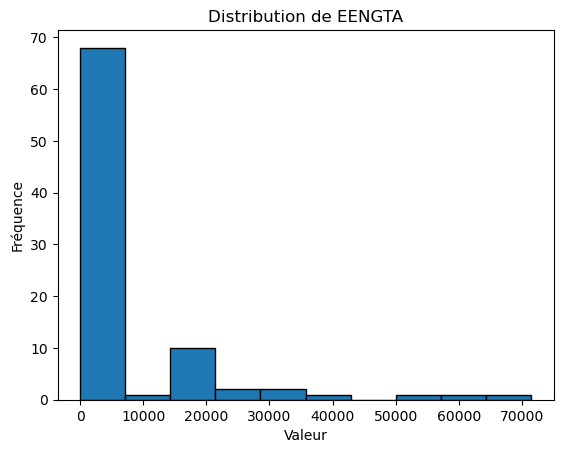

In [13]:


plt.hist(df_sum['EENGETA'], bins=10, edgecolor='black')
plt.title('Distribution de EENGTA')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')
plt.show()




Dans la majorité des départements l'état n'accorde pas de subventions durant la période pour la réparation ou l'achat d'une Ecole Normale de garçons, lorsqu'il le fait les montants varient de manière importante

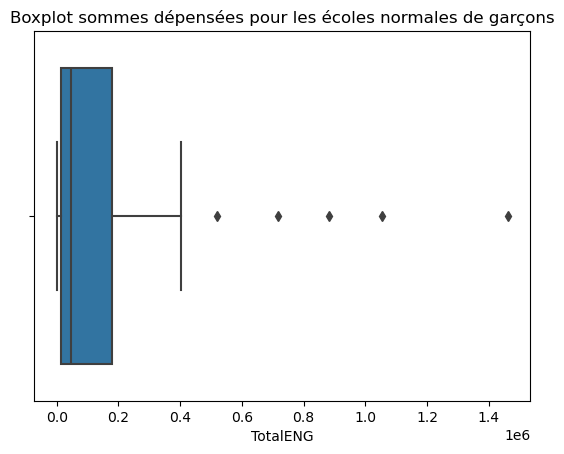

In [14]:


sns.boxplot(x=df_new['TotalENG'])
plt.title('Boxplot sommes dépensées pour les écoles normales de garçons')
plt.show()


/Users/prygiel/anaconda3/envs/notebook/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


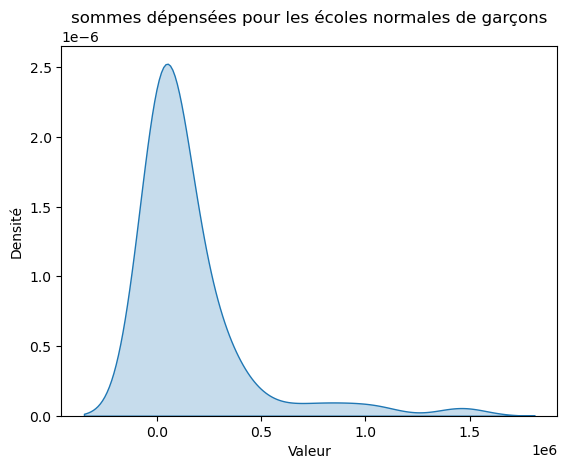

In [15]:
sns.kdeplot(df_new['TotalENG'], fill=True)
plt.title('sommes dépensées pour les écoles normales de garçons')
plt.xlabel('Valeur')
plt.ylabel('Densité')
plt.show()


Des calculs simples sont parfois utiles portant sur les lignes et les colonnes panda permet de le faire simplement


In [16]:

df_sum.to_excel('data5.xlsx', engine='openpyxl', index=False)


### Sommation d''une colonne

In [17]:
Total_Etat= df_sum['ENGETA'].sum()
# sommation de la colonne 
# le f indiqué après print indique que la chaîne de caractères est un fstring qui permet d'inclure des expressions python dans la chaîne. 
# Ici le budget total consacré par l'état à la construcion des ENG. Attention pris en charge à partir de python 3.6
print(f"La somme totale engagée par l'état pour la construction des Ecoles Normales de Garçons est de {Total_Etat} francs")

La somme totale engagée par l'état pour la construction des Ecoles Normales de Garçons est de 1821982.0 francs


### Formule prenant en compte plusieurs variables 

Je peux effectuer n'importe quel calcul à partir des valeurs présentes dans le dataframe pour une ou plusieurs lignes

In [18]:
print(df_sum['DPT'].dtype)
# je vérifie le typage de la variable utilisée comme clé de filtre

int64


In [19]:
# Je calcule la part des dépenses supportées par l'Etat central pour un département
# Filtrer la ligne pour le département de l'Ain en utilisant 'DPT' comme référence
# Le typage est important ici si DPT était une étiquette typée en chaîne de caractère il faudrait écrire == '01' 
ligne_departement_01 = df_sum[df_sum['DPT'] == 1]
# N'oubliens pas que python est un langage de programmation donc nous povons utiliser des blocs conditionnels, on y reviendra
# Vérifier si la sélection a retourné au moins une ligne

    # le calcul se fait étape par étape en créant une variable pour chaque résultat intermédiaire que l'on réutilise ensuite 

if not ligne_departement_01.empty:
    # Additionner les valeurs de EENGETA et ENGETA pour le département 01

    somme_variables = ligne_departement_01['EENGETA'].sum() + ligne_departement_01['ENGETA'].sum()
    
    # Diviser cette somme par la valeur de TotalENG pour obtenir le résultat
    resultat = somme_variables / ligne_departement_01['TotalENG'].values[0]
    
    print(f"Résultat pour le département 01 (DPT) : {resultat}")
else:
    print("Aucune ligne trouvée pour le département 01 (DPT)")


Résultat pour le département 01 (DPT) : 0.5616585446435947


Ca c'est pour un prochain carnet, on regarde les corrélations potentielles 

In [20]:
# Calcul de la matrice de corrélation
correlation_matrix = df_sum[['ENGETA', 'EENGETA', 'Emprunt', 'ENGDPT', 'ENGVIL', 'CENFETA', 'EENFETA', 'ENFDPT', 'ENFVIL']].corr()

# Affichage de la matrice de corrélation
print(correlation_matrix)


           ENGETA   EENGETA   Emprunt    ENGDPT    ENGVIL   CENFETA   EENFETA  \
ENGETA   1.000000 -0.107390  0.907671  0.009468  0.289131 -0.141416  0.431780   
EENGETA -0.107390  1.000000 -0.039752 -0.015063 -0.043478  0.286177  0.119041   
Emprunt  0.907671 -0.039752  1.000000 -0.044077  0.330255 -0.114843  0.531469   
ENGDPT   0.009468 -0.015063 -0.044077  1.000000 -0.006454 -0.077665 -0.034712   
ENGVIL   0.289131 -0.043478  0.330255 -0.006454  1.000000 -0.010516  0.173606   
CENFETA -0.141416  0.286177 -0.114843 -0.077665 -0.010516  1.000000 -0.063053   
EENFETA  0.431780  0.119041  0.531469 -0.034712  0.173606 -0.063053  1.000000   
ENFDPT  -0.072059  0.004143  0.039500  0.006296  0.018507  0.220477  0.033687   
ENFVIL  -0.079785  0.341089 -0.077835 -0.026941 -0.002537  0.405226 -0.054076   

           ENFDPT    ENFVIL  
ENGETA  -0.072059 -0.079785  
EENGETA  0.004143  0.341089  
Emprunt  0.039500 -0.077835  
ENGDPT   0.006296 -0.026941  
ENGVIL   0.018507 -0.002537  
CENFETA  

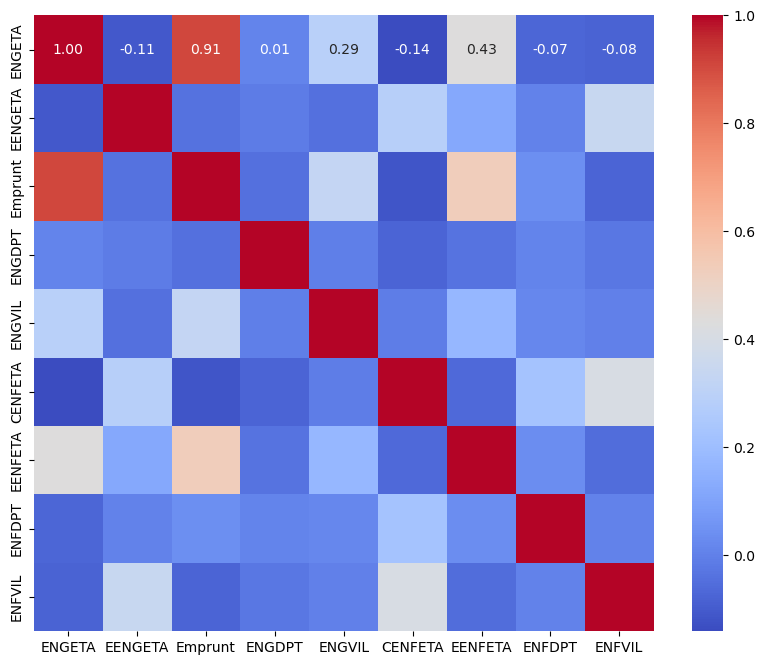

In [21]:


# Heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


## Corrléation de speaman 

La corrélation de Spearman est une mesure non paramétrique de la corrélation de rang qui peut capturer des relations monotones, y compris les variations inverses. Contrairement à Pearson, Spearman n'exige pas que la relation entre les variables soit linéaire ni que les variables soient distribuées normalement

In [22]:
correlation_matrix_spearman = df_sum[['ENGETA', 'EENGETA', 'Emprunt', 'ENGDPT', 'ENGVIL', 'CENFETA', 'EENFETA', 'ENFDPT', 'ENFVIL']].corr(method='spearman')
print(correlation_matrix_spearman)


           ENGETA   EENGETA   Emprunt    ENGDPT    ENGVIL   CENFETA   EENFETA  \
ENGETA   1.000000 -0.167183  0.589463  0.210008  0.257958 -0.040929  0.155864   
EENGETA -0.167183  1.000000  0.050557  0.358861  0.093104  0.228528  0.261231   
Emprunt  0.589463  0.050557  1.000000 -0.039092  0.304580 -0.002303  0.199011   
ENGDPT   0.210008  0.358861 -0.039092  1.000000  0.066209  0.080572  0.061028   
ENGVIL   0.257958  0.093104  0.304580  0.066209  1.000000  0.043839  0.077233   
CENFETA -0.040929  0.228528 -0.002303  0.080572  0.043839  1.000000  0.044074   
EENFETA  0.155864  0.261231  0.199011  0.061028  0.077233  0.044074  1.000000   
ENFDPT  -0.121870  0.139670 -0.128827  0.165416  0.040548  0.446940  0.380351   
ENFVIL  -0.069172  0.265115 -0.008446 -0.006861  0.079970  0.567934 -0.013850   

           ENFDPT    ENFVIL  
ENGETA  -0.121870 -0.069172  
EENGETA  0.139670  0.265115  
Emprunt -0.128827 -0.008446  
ENGDPT   0.165416 -0.006861  
ENGVIL   0.040548  0.079970  
CENFETA  

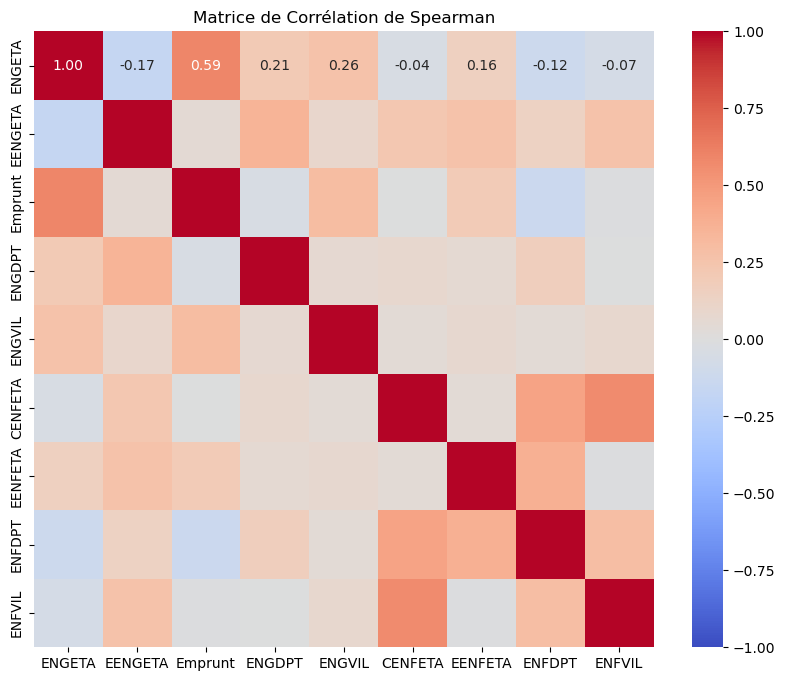

In [23]:

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Matrice de Corrélation de Spearman")
plt.show()


L'interprétatation de la valeur du coeeficient de corrélaton de Sperman est plus délicate que celle d'un coeficient de corrélation linéaire. Sa signification est fortemnet dépendante du contexte des données et de la taille de la population étudiée.<br>
Pour évaluer formellement si une corrélation de Spearman est statistiquement significative, vous pouvez effectuer un test de significativité, tel qu'un test de corrélation de Spearman. Ce test évalue si la corrélation observée diffère significativement de zéro (aucune corrélation). Le résultat du test vous donnera une valeur p, qui indique la probabilité d'observer une corrélation d'au moins cette magnitude si, en réalité, aucune relation n'existait entre les variables (hypothèse nulle).<br>
Si la valeur p est inférieure à un seuil de significativité prédéfini (souvent 0,05 ou 0,01), vous pouvez rejeter l'hypothèse nulle et conclure que la corrélation est statistiquement significative, ce qui signifie qu'il est improbable d'observer une telle corrélation par hasard seul.

In [24]:
from scipy.stats import spearmanr

# Supposons que x et y sont vos variables
x = df_sum['ENGVIL']
y = df_sum['ENGETA']

correlation, p_value = spearmanr(x, y)

print(f"Corrélation de Spearman: {correlation}, Valeur p: {p_value}")


Corrélation de Spearman: 0.2579580615972686, Valeur p: 0.015854463269579074


Avec une valeur de p <0.05 nous sommes dans une zone de significativité qui, dans le contexte des sciences sociales mérite de retenir l'attention. Il est possible qu'un lien complexe existe entre le montant des subventions d'état accordées durant la période pour la réparation ou l'achat d'une EN et le montant des dépenses assumées par la ville pour son Ecole Normale de garçon

In [25]:
from scipy.stats import spearmanr

# Supposons que x et y sont vos variables
x = df_sum['ENGDPT']
y = df_sum['ENGETA']

correlation, p_value = spearmanr(x, y)

print(f"Corrélation de Spearman: {correlation}, Valeur p: {p_value}")

Corrélation de Spearman: 0.21000778687070998, Valeur p: 0.05090010270511223
